### APPLIED MACHINE LEARNING AND BIG DATA STRATEGY COURSEWORK PART 2

## OBJECTIVE

To predict company bankruptcy

## CONTEXT
Data was downloaded from kaggle https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction.
The data was gotten from Taiwan Economic Journal from 1999 to 2009 and company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('max_columns', 100)

## Import Dataset

In [3]:
df = pd.read_csv('Bankruptcy_data.csv')

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

## Describe Dataset

In [5]:
#to get the features of the csv file
df.shape 

(6819, 96)

This output shows that there are 6819 `rows` and 96 `columns` in the Bankruptcy_data.csv dataset

In [6]:
# To check for missimg variables
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [7]:
#To check for missing data
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [8]:
# To check for the sum of duplicated variables
df.duplicated().sum()

0

In [9]:
# To check the information of variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [10]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [11]:
# To check the bankrupt? variable information
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [12]:
#To describe the variable in a barchat showing the value in `Bankrupt?`
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Bankrupt?'>

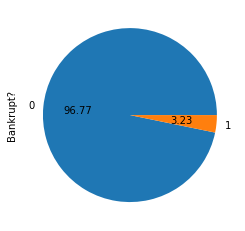

In [13]:
#to give a piechart of the target variable
df['Bankrupt?'].value_counts().plot.pie(autopct="%.2f")

Text(0.5, 1.0, 'Target Variable')

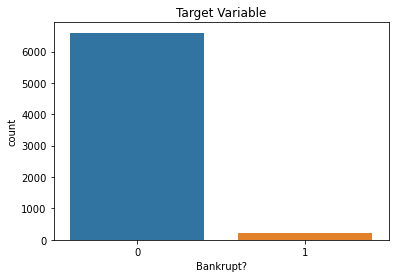

In [14]:
# to give a bar chart of the target variable
sns.countplot(x=df['Bankrupt?'])
plt.title('Target Variable')

In [15]:
X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']

## Data type and quality:

There are 96 columns (95 independent variable + 1 dependent variable) in the dataset, and 6819 rows (companies)
There is no missing data, no null values, no duplicated rows or na values
Out of the 6819 companies in the dataset:

6599 (97%) did not go bankrupt

220 (3%) went bankrupt

## EXPLORATORY DATA ANALYSIS

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200 
plt.rcParams["figure.figsize"] = (5,5)
%matplotlib inline

In [17]:
import dtale
att = dtale.show(df)

In [18]:
# To display detailed features of the data set
att

# To check for correlation of independent variables to dependent variable `Bankrupt?`

<AxesSubplot:>

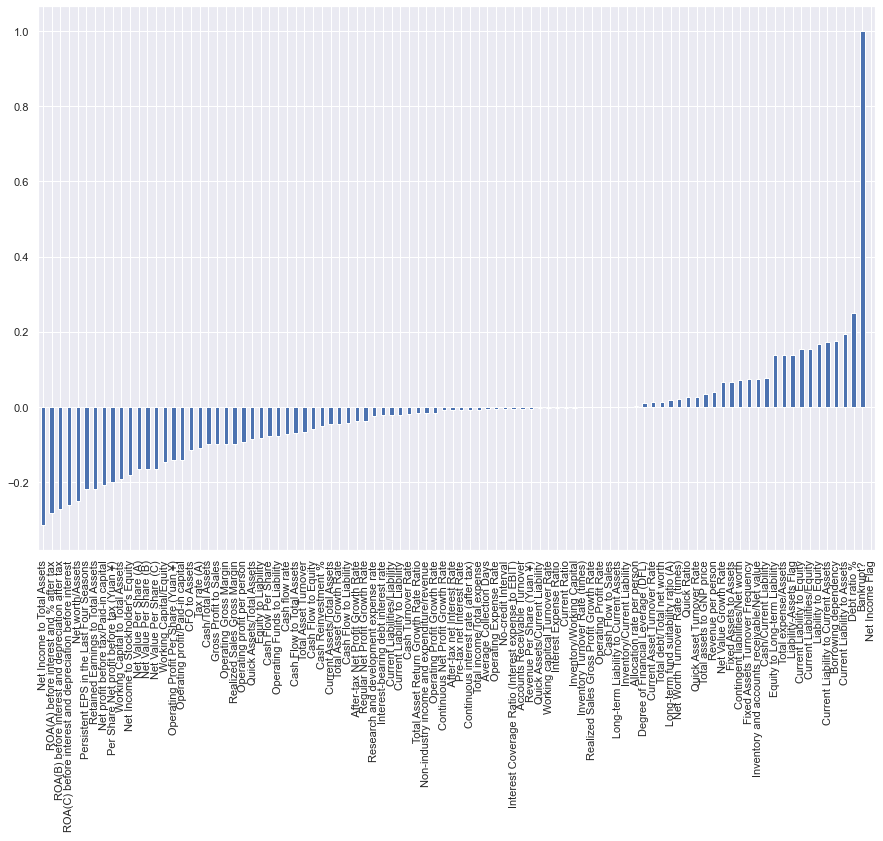

In [19]:
corr = df.corr()
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
df.corr()['Bankrupt?'][:].sort_values().plot(kind='bar')
#sns.heatmap(corr, cmap="YlOrBr")

The data set has a total of 96 variable, however not all the variable are correlated to the target variabe also not all correlated variable will be used to avoid overfitting and to make simplify the model.
to achieve this;
1) Variables with less correlation to the target variable will be dropped, and variables with a correlation greater than 0.7 to other variables(like ROA(B) and ROA(A) gives correlation of 0.99 to ROA(C), and ROA(C) has the highest correation to the target variable). 
2) The best number of variable will be selected using feature ranking, recursive feature elimination, and cross-validated selection. 

## Feature selection 

From the correlation metric its shows that not all independent variable are correlated to the dependent.
To avoid overfitting and to simplify model variables with less correlation to the `Bankrupt?`

In [20]:
#Drop constant columns (if any)
from sklearn.feature_selection import RFECV, f_classif, VarianceThreshold, SelectKBest

var_thres = VarianceThreshold(threshold=0).fit(df)
constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]
for variable in constant_columns:
     print(variable)
df.drop(constant_columns,axis=1, inplace=True)

 Net Income Flag


In [21]:
#import library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Normalize data for faster processing
def data_scaling(NormData):
    scaler = StandardScaler()
    NormData.iloc[:,1:] = scaler.fit_transform(NormData.iloc[:,1:])
    return(NormData)
df = data_scaling(df)

#Split dataframe for feature selection
X = df.drop(columns=["Bankrupt?"])
y = df["Bankrupt?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
df_train =pd.concat([y_train, X_train], axis=1)

In [22]:
#Sort columns from the less correlated to the most correlated
df_train_corr = df_train.corr()
df_train_corr = df_train_corr.reindex(df_train_corr["Bankrupt?"].abs().sort_values(ascending=True).index).T
column_names = np.array(df_train_corr.columns)
df_train= df_train.reindex(columns=column_names)

In [23]:
#Isolate the input features which have a high correlation between themselves
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # to get the absolute coeff value
                colname = corr_matrix.columns[i]  # getting the column name
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.7)
display(len(corr_features))

34

In [24]:
#Now let's go ahead and drop them:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
df_train.drop(corr_features,axis=1, inplace=True)
df_train.head()

,Realized Sales Gross Profit Growth Rate,Degree of Financial Leverage (DFL),Operating Profit Rate,Revenue per person,Current Ratio,Total debt/Total net worth,Interest Expense Ratio,Quick Assets/Current Liability,Allocation rate per person,Revenue Per Share (Yuan ¥),Continuous Net Profit Growth Rate,Long-term Liability to Current Assets,Interest Coverage Ratio (Interest expense to EBIT),Inventory Turnover Rate (times),Average Collection Days,Total income/Total expense,Inventory/Working Capital,Accounts Receivable Turnover,Quick Asset Turnover Rate,Operating Expense Rate,Inventory/Current Liability,Operating Profit Growth Rate,No-credit Interval,Non-industry income and expenditure/revenue,Total Asset Return Growth Rate Ratio,Long-term fund suitability ratio (A),Current Asset Turnover Rate,Cash Turnover Rate,Interest-bearing debt interest rate,Total assets to GNP price,Research and development expense rate,Quick Ratio,Current Liabilities/Liability,After-tax Net Profit Growth Rate,Total Asset Growth Rate,Cash Flow Per Share,Cash Flow to Total Assets,Cash/Current Liability,Cash Flow to Equity,Cash flow rate,Net Value Growth Rate,Fixed Assets to Assets,Contingent liabilities/Net worth,Total Asset Turnover,Operating profit per person,Equity to Liability,Quick Assets/Total Assets,Fixed Assets Turnover Frequency,Cash/Total Assets,Tax rate (A),Operating Gross Margin,Total expense/Assets,Inventory and accounts receivable/Net value,Liability-Assets Flag,Net Value Per Share (B),Current Liability to Current Assets,Working Capital to Total Assets,Borrowing dependency,Debt ratio %,ROA(C) before interest and depreciation before interest,Bankrupt?
4106,-0.019806,-0.047864,0.028402,-0.017024,-0.012111,-0.026226,-0.033674,-0.020937,-0.038222,-0.025697,-0.003786,-0.094979,-0.015069,1.915460,-0.038333,-0.012708,-0.020963,-0.045967,-0.641164,-0.616334,-0.095887,0.007385,0.003956,-0.009811,-0.007402,-0.123134,-0.423919,-0.841264,-0.151921,-0.049491,-0.750713,-0.034237,1.138270,0.022632,0.766833,0.608306,1.451370,-0.072818,0.615384,0.587161,-0.013721,-0.012111,-0.049430,0.274969,-0.036683,0.268111,0.375355,-0.407123,1.458876,0.428464,0.411719,0.378993,-0.296430,-0.034272,0.202488,-0.461267,0.766136,-0.308082,-0.926077,0.651736,0
2799,-0.016790,-0.047511,0.020524,-0.017024,-0.012111,-0.026226,-0.031663,-0.020937,-0.038222,-0.025697,-0.001696,-0.094979,-0.013083,-0.661726,-0.038333,-0.005600,-0.024157,-0.045967,1.536809,-0.616334,-0.095887,0.018492,-0.007333,0.010954,0.089473,-0.097791,-0.163014,-0.477121,-0.151921,-0.049491,-0.529012,-0.034237,0.313191,0.036159,-1.900979,1.052176,-0.065158,-0.072818,-0.031906,0.215597,-0.013721,-0.012111,-0.008532,1.623941,-0.160057,-0.359716,0.404464,-0.407123,-0.716236,0.371521,-0.130943,0.512612,-0.131518,-0.034272,0.446078,0.053304,-0.318475,-0.253349,0.233511,1.786097,0
1596,-0.031086,-0.047821,0.026972,-0.017024,-0.012111,-0.026226,-0.033491,-0.020937,-0.038222,-0.025697,-0.006275,-0.094979,-0.014828,-0.661726,-0.038333,-0.009178,-0.038703,-0.045967,-0.641164,-0.616334,-0.095887,-0.002429,0.043382,0.009850,-0.067172,-0.125459,-0.423919,0.948821,-0.151921,-0.049491,2.282272,-0.034237,0.793778,0.010072,0.338879,-0.088628,-2.591799,-0.072818,-0.931246,1.888570,-0.013721,-0.012111,-0.049430,-0.910941,-0.136903,8.465752,0.265349,2.220658,-0.720494,-0.829388,0.882026,-0.405042,-0.599708,-0.034272,0.381709,-0.931539,0.896829,-0.308082,-2.008285,-0.240811,0
2278,-0.065226,-0.056615,0.011375,-0.017024,-0.012111,-0.026226,-0.077374,-0.020937,-0.038222,-0.025697,-0.009204,-0.094979,-0.071912,2.167944,-0.038333,-0.055785,0.037757,-0.045967,-0.641164,-0.498339,-0.095887,-0.012683,-0.052014,-0.012149,-0.060639,-0.126138,-0.423919,-0.606103,-0.151921,-0.049491,-0.750713,-0.034237,0.651901,-0.011283,1.101604,-2.151315,-0.708459,-0.072818,-0.928403,-0.723406,-0.013721,-0.012111,-0.049430,-0.051156,-0.403006,-0.662117,1.234894,-0.407123,-0.835922,-0.829388,-0.948979,-0.775451,1.958044,-0.034272,-0.975075,0.325109,-0.544947,0.72024

In [25]:
#import library
from sklearn.linear_model import LogisticRegression

#Use rfecv to futher reduce the variables
lgr = LogisticRegression(max_iter=1000)
rfecv = RFECV(estimator=lgr, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

select_features_rfecv = pd.DataFrame({'Features': list(X_train.columns),
                                  'Ranking_cv': rfecv.ranking_})
select_features_rfecv = select_features_rfecv.sort_values(by='Ranking_cv')

#To get the correlation score
select_features = SelectKBest(score_func=f_classif, k=10).fit(X_train, y_train)
select_features_kbest = pd.DataFrame({'Features': list(X_train.columns),
                                  'Scores': select_features.scores_})
select_features_kbest.sort_values(by='Scores', ascending = False)

#To show the result
select_features_rfecv.merge(select_features_kbest, how='left', on='Features').head(20)

,Features,Ranking_cv,Scores
0,ROA(C) before interest and depreciation befor...,1,336.441815
1,Total income/Total expense,1,0.234927
2,Cash/Total Assets,1,50.185958
3,Total Asset Turnover,1,34.046873
4,Debt ratio %,1,322.286662
5,Net Value Per Share (B),1,125.712478
6,Accounts Receivable Turnover,1,0.303904
7,Equity to Liability,1,44.999485
8,Operating Profit Rate,1,0.012624
9,Fixed Assets Turnover Frequency,2,49.007243


In [26]:
# Select the 9 most important features. We will certainly remove the 3 features with scores lower than 1, but I am interested

features = ["Bankrupt?"]
for i in range (9):
    features.append(select_features_rfecv.iloc[i,0])
best_df = df.loc[:, df.columns.isin(features)]
round(best_df.describe(),2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Profit Rate,Net Value Per Share (B),Debt ratio %,Total Asset Turnover,Accounts Receivable Turnover,Cash/Total Assets,Total income/Total expense,Equity to Liability
count,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00
mean,0.03,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
std,0.18,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.00,-8.33,-76.77,-5.71,-2.10,-1.40,-0.05,-0.89,-0.21,-0.95
25%,0.00,-0.47,0.02,-0.51,-0.75,-0.64,-0.05,-0.65,-0.03,-0.46
50%,0.00,-0.04,0.02,-0.19,-0.03,-0.23,-0.05,-0.35,-0.02,-0.28
75%,0.00,0.50,0.03,0.27,0.66,0.35,-0.05,0.27,-0.00,0.11
max,1.00,8.15,0.10,24.24,16.45,8.49,34.96,6.29,82.49,19.04


In [27]:
#To modify variable name for clarity
best_df = best_df.rename(columns={' ROA(C) before interest and depreciation before interest': ' ROA(C)'})

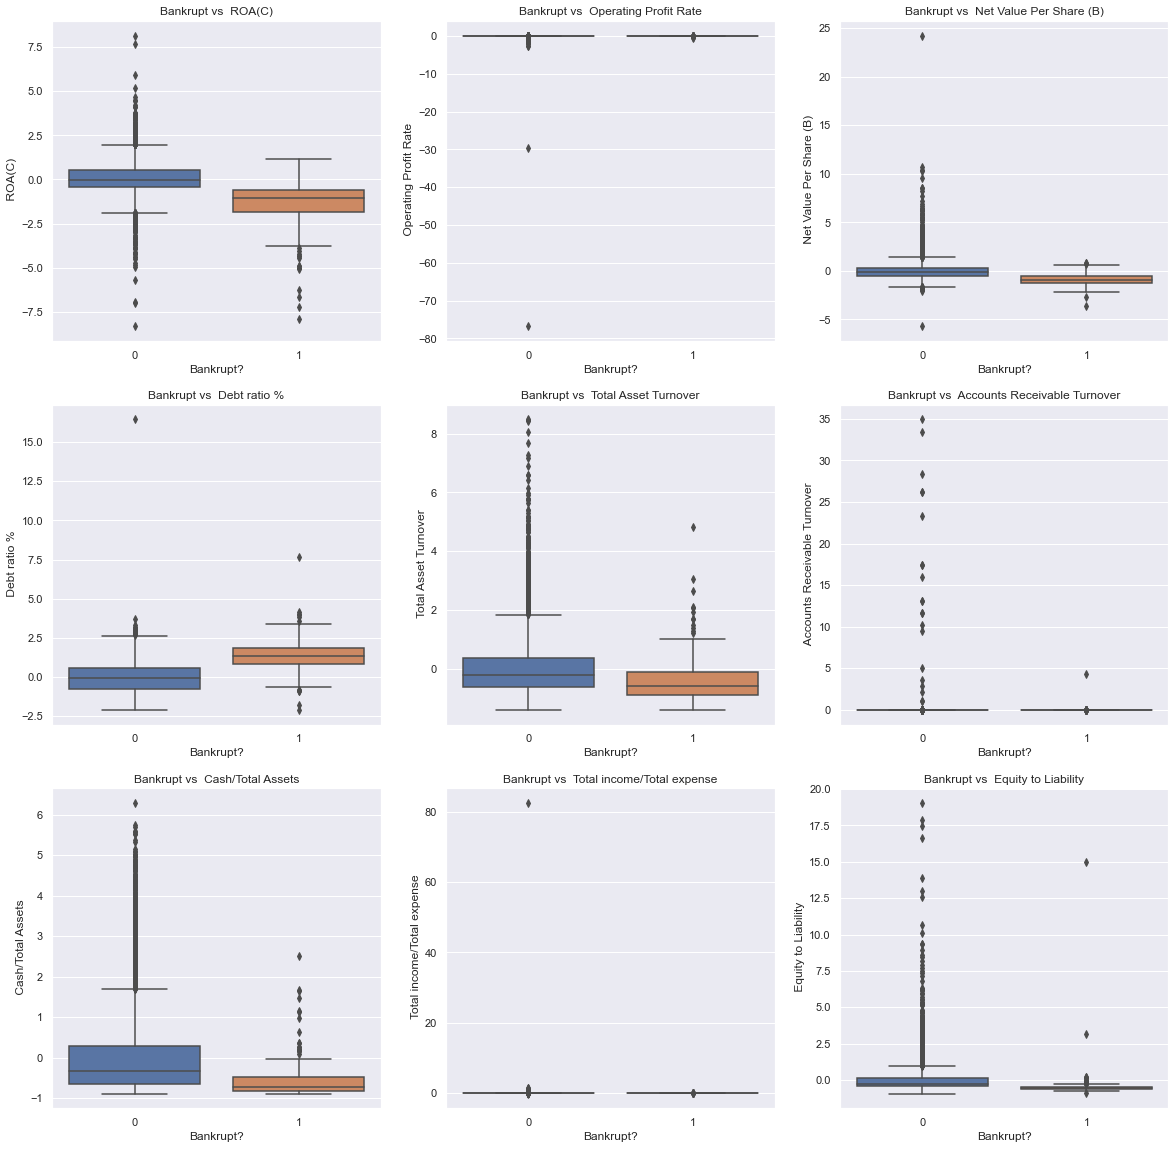

In [28]:
#plotting boxplot to look for outliers:
fig, saxis = plt.subplots(3, 3,figsize=(20,20))
for i in range(3):
    sns.boxplot(x = "Bankrupt?", y=best_df.columns[i+1], data=best_df, ax=saxis[0,i])
    saxis[0,i].set_title(f"Bankrupt vs {best_df.columns[i+1]}")

for i in range(3):
    sns.boxplot(x = "Bankrupt?", y=best_df.columns[i+4], data=best_df, ax=saxis[1,i])
    saxis[1,i].set_title(f"Bankrupt vs {best_df.columns[i+4]}")
    
for i in range(3):
    sns.boxplot(x = "Bankrupt?", y=best_df.columns[i+7], data=best_df, ax=saxis[2,i])
    saxis[2,i].set_title(f"Bankrupt vs {best_df.columns[i+7]}")

Looking at the boxplots, it appears that Account Receivable Turnover, Total income /  Total expense and Operating profit Rate have the lowest k score are mainly impactful due to outliers.
To further reduce the variable for better modeling these variables will be removed

In [29]:
# To remove the Variables

best_df.drop(' Accounts Receivable Turnover', axis=1, inplace=True)
best_df.drop(' Total income/Total expense', axis=1, inplace=True)
best_df.drop(' Operating Profit Rate', axis=1, inplace=True)
best_df.shape
best_df.head()

,Bankrupt?,ROA(C),Net Value Per Share (B),Debt ratio %,Total Asset Turnover,Cash/Total Assets,Equity to Liability
0,1,-2.217909,-1.279247,1.750845,-0.540344,-0.861820,-0.622067
1,1,-0.673828,-0.251878,1.075727,-0.762702,-0.783873,-0.535573
2,1,-1.303672,-0.381876,1.749724,-1.251890,-0.884109,-0.621960
3,1,-1.735886,-1.092453,0.710131,-0.510696,-0.755844,-0.471826
4,1,-0.661778,-0.693621,-0.123674,0.334264,-0.789524,-0.241715


## Data Modelling

## Random Forest Classifier

In [30]:
X = best_df.drop(columns=["Bankrupt?"])
y = best_df["Bankrupt?"]

From the bar chart it shows that the data is plainly skewed, given there are more non-bankrupt company than bankrupt company. To have a balanced data set, the data will be resampled for a better performance. 

The dataset is skewed, so oversample only the train data with SMOTE. Keep the test data separate to prevent any feature leakage.

In [31]:
# to import library
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

oversample = SMOTE()
X_train, y_train=oversample.fit_resample(X_train, y_train)

clf = RandomForestClassifier(max_depth=75, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
print('Accuracy: ',accuracy_score(y_test, y_pred))



Accuracy:  0.929808973789427


In [34]:
print('Classification Report: \n', classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      2170
           1       0.28      0.63      0.39        81

    accuracy                           0.93      2251
   macro avg       0.64      0.79      0.68      2251
weighted avg       0.96      0.93      0.94      2251



In [35]:
confusion_matrix(y_test, y_pred)

array([[2042,  128],
       [  30,   51]], dtype=int64)

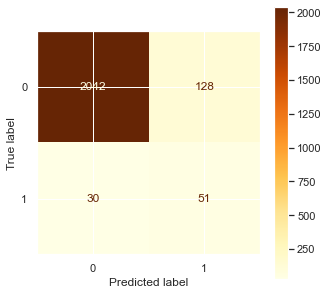

In [36]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot(cmap="YlOrBr")

## Logistics Regression

In [37]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [38]:
log_reg.score(X_test,y_test)

0.8494002665482008

## Metric

In [39]:
y_pred3=log_reg.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      2170
           1       0.18      0.93      0.31        81

    accuracy                           0.85      2251
   macro avg       0.59      0.89      0.61      2251
weighted avg       0.97      0.85      0.89      2251



<AxesSubplot:>

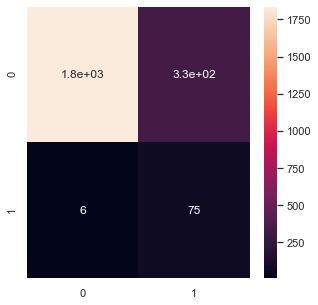

In [42]:
sns.heatmap(confusion_matrix(y_test,y_pred3), annot=True)

## Support Vector Machine - Classification

In [43]:
from sklearn.svm import SVC

ml = SVC()
ml.fit(X_train, y_train)

SVC()

In [44]:
ml.score(X_test,y_test)

0.8467347845402043

In [45]:
svc_predict=ml.predict(X_test)

## Metrics 

In [46]:
accuracy_score(y_test,svc_predict)

0.8467347845402043

In [47]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      2170
           1       0.18      0.90      0.30        81

    accuracy                           0.85      2251
   macro avg       0.59      0.87      0.61      2251
weighted avg       0.97      0.85      0.89      2251



<AxesSubplot:>

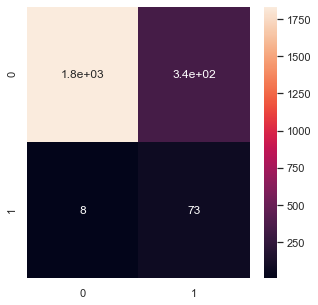

In [48]:
sns.heatmap(confusion_matrix(y_test,svc_predict,), annot=True)

## Conclusion


Based on what we have done previously, we can conclude that the 6 features selected are quite representative of the risk of going bankrupt.

All three models achieved at least some relative success, the Random forest performed well above the others with and accuracy of 92.9%, while Logistics regression and Support Vector Machine gave an accuracy of 84.9% and 84.5 % respectively. All three model Random forest, Logistic regression and SVM gave f1-score of 0.96, 0.92 and 0.91, respectivelyAll three models achieved at least some relative success, the Random forest performed well above the others with and accuracy of 92.9%, while Logistics regression and Support Vector Machine gave an accuracy of 84.9% and 84.5 % respectively. All three model Random forest, Logistic regression and SVM gave f1-score of 0.96, 0.92 and 0.91, respectively.